In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from sentinelhub import SentinelHubRequest, DataCollection, MimeType, CRS, BBox, SHConfig
from dotenv import load_dotenv
from pyproj import Transformer
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import folium
import cv2

/home/k2805/.pyenv/versions/urban_watch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()  # charge automatiquement le .env du dossier courant

True

In [3]:
list_bbox_centers = [(43.52960344286241, 5.448962145567533),
(48.092094070852475, -1.7036876101196967),
 (48.121222106840435, -1.602864906604979),
 (45.74557103359813, 4.803091960652229),
 (47.8776770361181, -3.909947991759771),
 (44.55378060775165, 4.28389205759154),
 (45.69764498502806, 5.8945655967385315),
 (48.07500134978729, 7.3491231648955155),
 (50.63412206750312, 3.0435779303880106),
 (44.83078182200822, 0.5108123933396876)]

In [4]:
from urban_watch.ml_logic.data import RAW_DATA_DIR
print(RAW_DATA_DIR)

/home/k2805/code/augustinlafond/project_urban_watch/raw_data


In [5]:
from urban_watch.ml_logic.data import make_bbox_global, get_data

data = get_data(list_bbox_centers)

📡 Downloading tile 0 at 43.52960344286241,5.448962145567533 ...
✔ Saved tile 0 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_0
📡 Downloading tile 1 at 48.092094070852475,-1.7036876101196967 ...
✔ Saved tile 1 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_1
📡 Downloading tile 2 at 48.121222106840435,-1.602864906604979 ...
✔ Saved tile 2 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_2
📡 Downloading tile 3 at 45.74557103359813,4.803091960652229 ...
✔ Saved tile 3 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_3
📡 Downloading tile 4 at 47.8776770361181,-3.909947991759771 ...
✔ Saved tile 4 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_4
📡 Downloading tile 5 at 44.55378060775165,4.28389205759154 ...
✔ Saved tile 5 in /home/k2805/code/augustinlafond/project_urban_watch/raw_data/tile_5
📡 Downloading tile 6 at 45.69764498502806,5.8945655967385315 ...
✔ Saved tile 6 in /home/k2805/c

In [6]:
from urban_watch.ml_logic.data import load_data

X, meta = load_data()

In [7]:
from urban_watch.ml_logic.data import RAW_DATA_DIR, make_bbox_global, get_data, load_data
from urban_watch.ml_logic.package import CloudMasker


In [14]:
scl = img[:,:,5]
print(np.unique(scl))

[255]


In [18]:
img=X[1]
img

array([[[205, 201, 202, 200,  87, 255],
        [204, 200, 202, 199,  94, 255],
        [206, 202, 204, 201,  94, 255],
        ...,
        [199, 195, 195, 199, 107, 255],
        [198, 196, 195, 198, 107, 255],
        [197, 194, 192, 198, 102, 255]],

       [[206, 200, 202, 203,  91, 255],
        [207, 201, 202, 201,  98, 255],
        [205, 203, 205, 202,  98, 255],
        ...,
        [197, 197, 195, 201, 105, 255],
        [197, 196, 194, 198, 105, 255],
        [196, 194, 192, 197,  99, 255]],

       [[207, 202, 202, 203,  91, 255],
        [208, 203, 204, 202,  98, 255],
        [207, 205, 205, 203,  98, 255],
        ...,
        [197, 197, 196, 198, 105, 255],
        [196, 196, 194, 198, 105, 255],
        [195, 194, 191, 196,  99, 255]],

       ...,

       [[192, 192, 193, 192,  91, 255],
        [193, 192, 194, 193,  94, 255],
        [193, 192, 195, 193,  94, 255],
        ...,
        [209, 210, 209, 214, 115, 255],
        [208, 210, 207, 213, 115, 255],
        [

In [42]:
# --- 2) Détection des nuages ---
mask = CloudMasker.detect_clouds_scl(img, scl_band_idx=5)
cloud_pct = CloudMasker.get_cloud_percentage(mask)
print(f"\nPourcentage de nuages détectés : {cloud_pct:.2f}%")


Pourcentage de nuages détectés : 0.00%


In [45]:
CloudMasker.scl_info(img, scl_band_idx=5)


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
--------------------------------------------------
--------------------------------------------------


In [43]:
# --- 3) Application du masque sur les 5 bandes ---
image_cleaned = CloudMasker.apply_mask(img[:, :, :5], mask)

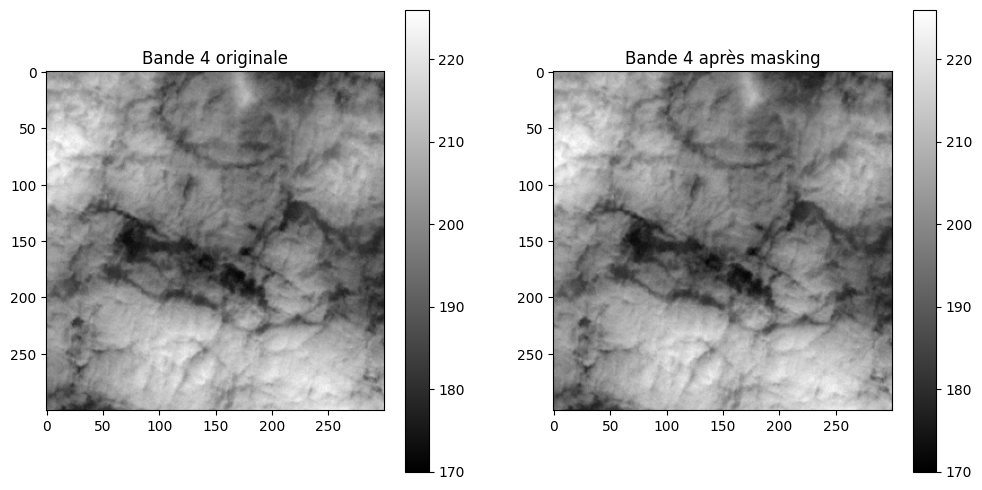

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Bande 4 originale")
plt.imshow(img[:, :, 3], cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Bande 4 après masking")
plt.imshow(image_cleaned[:, :, 3], cmap='gray')
plt.colorbar()

plt.show()